<a href="https://colab.research.google.com/github/nicholasgriffen/intro-web-scraping/blob/master/NewsPageAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

We'll write some Python programs to work with the first Google News Search page for "Vail Colorado" - [this page](https://www.google.com/search?tbm=nws&q=vail+colorado).  Our programs will utilize several existing **Modules**, open source libraries of Python code. Below, I list some goals and the name of each relevant **Module**. Click the names for more information.

Our goals: 

1) retrieve with [Requests](http://docs.python-requests.org/en/master/)
---
2) format and examine with [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/)
---
3) transform with  [re](https://docs.python.org/3/library/re.html)
---
4) visualize with  [Pandas](https://pandas.pydata.org/)
---
5) analyze with [NLTK](https://www.nltk.org/)
---

# Importing Modules

In [0]:
# Comments are notes to ourselves and others, 
# unaffected by the syntactical rules of Python 
# Comments begin with a " # " symbol
# in Google Colab, hold ctrl or cmd and / to toggle a line comment
#
# The statements below import Modules 
# In other words, define names we'll use to invoke Module code 
import requests
from bs4 import BeautifulSoup
import re
import pandas
import nltk

# Retrieving the HTML Document

In [165]:
# store request url in a variable
request_url = "https://www.google.com/search?tbm=nws&q=vail+colorado"

# use the get function from the requests Module  
# store the output of the function in a variable
response = requests.get(request_url)

# extract the content from our response
# refer to http://docs.python-requests.org/en/master/api/#requests.Response
news_page = response.content

# use the built-in print function to display the news_page
print(news_page)

b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=galvanize+boulder&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=r6CvXNugAsvg0gKP0a-YBg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=galvanize+boulder&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=r6CvXNugAsvg0gKP0a-YBg">here</a> if you are not redirected within a few seconds.</div></noscript><title>galvanize boulder - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5

# Formatting and Examining the HTML

In [166]:
# use the BeautifulSoup function to create an interface to the HTML doc 
# store the interface in a variable
document_interface = BeautifulSoup(news_page)

# use the prettify method on the document_interface
# store the formatted HTML in a variable
formatted_news = document_interface.prettify()

# use the built-in print function to examine the formatted_news
print(formatted_news)

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <noscript>
   <meta content="0;url=/search?q=galvanize+boulder&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=r6CvXNugAsvg0gKP0a-YBg" http-equiv="refresh"/>
   <style>
    table,div,span,p{display:none}
   </style>
   <div style="display:block">
    Please click
    <a href="/search?q=galvanize+boulder&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=r6CvXNugAsvg0gKP0a-YBg">
     here
    </a>
    if you are not redirected within a few seconds.
   </div>
  </noscript>
  <title>
   galvanize boulder - Google Search
  </title>
  <style>
   #gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0

## Identifying Content

In [167]:
# Headlines look something like the example below
# <h3 class="r">
#   <a href="/url?q=https://www.vaildaily.com/news/its-rockslide-season-in-the-rockies/&amp;sa=U&amp;ved=0ahUKEwjTxriLosXhAhUCuVkKHaanAL8QqQIIISgAMAU&amp;usg=AOvVaw0xTTBcc4YQSad8QH01hD1O">
#    It's rockslide season in the Rockies
#   </a>
# </h3>

headlines = []
# use the document_interface to retrieve all h3 elements
h3_elements = document_interface.find_all('h3')

# for each h3 element in h3_elements
for h3 in h3_elements:
# use the built-in print function to examine the text of each element
  print(h3.text)
# collect the headline in a list for later use 
  headlines.append(h3.text)

# use the built-in print function to examine the list of elements
# print(h3_elements)

# use the built-in print function to examine one element
# print(h3_elements[0])

# use the built-in print function to examine the href of each h3.a element
# for h3 in h3_elements:
#   print(h3.a.get('href'))

Galvanize campus tour and other Boulder-area events April 4, 2019
Galvanize Names Bill Cummings as Executive Vice President ...
Galvanize to host hardware pitch competition
Galvanize to buy Hack Reactor
Boulder Arts Week kicks off today on stage, behind the mic and on ...
Arrival of WeWork later this year will expand Boulder coworking ...
The 21 Best Events in Denver, March 26 Through April 1
216 Pot Dispensaries, 45 Co-Working Spaces, and the Hot Pursuit ...
Report seeks ingredients for Boulder's economic secret sauce
Virtual Reality on Display at the Boulder International Film Festival


In [168]:
# Sources look something like the example below
# <div class="slp">
#   <span class="f">
#     Vail Daily News - Apr 3, 2019
#   </span>
# </div>

sources = []
# use the document_interface to retrieve all div elements with class slp
source_elements = document_interface.find_all('div', attrs = {'class': 'slp'})

# for each source element in source_elements
for source in source_elements:
# use the built-in print function to examine the text of each element
  print(source.text)
# collect the headline in a list for later use 
  sources.append(source.text)
  
# use the built-in print function to examine the list of elements
# print(source_elements)

# use the built-in print function to examine one element
# print(source_elements[0])

# use the built-in print function to examine the text of each element
# for source in source_elements:
#   print(source.text)

Boulder Daily Camera - Apr 3, 2019
PRNewswire (press release) - 1 day ago
BizWest - Apr 4, 2019
Boulder Daily Camera - Jul 20, 2018
Boulder Daily Camera - Mar 29, 2019
Boulder Daily Camera - Jan 15, 2019
Westword - Mar 26, 2019
Inc.com - Mar 12, 2019
Boulder Daily Camera - Sep 8, 2018
Crescent Vale (blog) - Mar 3, 2019


# Transforming the Text of HTML Elements

In [169]:
# Source element text contains a name and date like below
# Vail Daily News - Apr 3, 2019
# we are interested in transforming the source 
# to include only the source name
source_names = []

# define a pattern corresponding to text from the - to the end
# refer to https://docs.python.org/2/library/re.html
date_pattern =r'\- .*$'

# for each source, use re.sub 
# substitute '' for the date_pattern
for source in sources:
  source_name = re.sub(date_pattern, '', source)
# use the built-in print function to see the transformed text
  print(source_name)
# collect the source_name into a list for later use
  source_names.append(source_name)

Boulder Daily Camera 
PRNewswire (press release) 
BizWest 
Boulder Daily Camera 
Boulder Daily Camera 
Boulder Daily Camera 
Westword 
Inc.com 
Boulder Daily Camera 
Crescent Vale (blog) 


# Visualizing Sources and Headlines

In [170]:
# use DataFrame method from pandas Module
# to create table of sources to headlines
# refer to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
table = pandas.DataFrame({'Source': source_names, 
                          'Headline': headlines, 
                          'Headline Length': [len(headline) for headline in headlines]})

table


,Headline,Headline Length,Source
0,Galvanize campus tour and other Boulder-area e...,65,Boulder Daily Camera
1,Galvanize Names Bill Cummings as Executive Vic...,61,PRNewswire (press release)
2,Galvanize to host hardware pitch competition,44,BizWest
3,Galvanize to buy Hack Reactor,29,Boulder Daily Camera
4,"Boulder Arts Week kicks off today on stage, be...",69,Boulder Daily Camera
5,Arrival of WeWork later this year will expand ...,67,Boulder Daily Camera
6,"The 21 Best Events in Denver, March 26 Through...",54,Westword
7,"216 Pot Dispensaries, 45 Co-Working Spaces, an...",67,Inc.com
8,Report seeks ingredients for Boulder's economi...,60,Boulder Daily Camera
9,Virtual Reality on Display at the Boulder Inte...,69,Crescent Vale (blog)


## Refining the Visualization

### Sorting Headlines by Length

In [171]:
# use the sort_values method to sort the rows by Headline Length
by_length = table.sort_values('Headline Length')

by_length
# If you want to reset the index, uncomment the line below
# by_length.reset_index().drop(columns='index')

,Headline,Headline Length,Source
3,Galvanize to buy Hack Reactor,29,Boulder Daily Camera
2,Galvanize to host hardware pitch competition,44,BizWest
6,"The 21 Best Events in Denver, March 26 Through...",54,Westword
8,Report seeks ingredients for Boulder's economi...,60,Boulder Daily Camera
1,Galvanize Names Bill Cummings as Executive Vic...,61,PRNewswire (press release)
0,Galvanize campus tour and other Boulder-area e...,65,Boulder Daily Camera
5,Arrival of WeWork later this year will expand ...,67,Boulder Daily Camera
7,"216 Pot Dispensaries, 45 Co-Working Spaces, an...",67,Inc.com
4,"Boulder Arts Week kicks off today on stage, be...",69,Boulder Daily Camera
9,Virtual Reality on Display at the Boulder Inte...,69,Crescent Vale (blog)


### Grouping Headlines by Source

In [172]:
# refer to http://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
# use the groupby method to collect the rows by source column
source_grouping = table.groupby(['Source'])

# use the describe method to compute statistics if possible
# gives statistics of the Headline Length column
source_grouping.describe()

Headline Length                               \
                                      count  mean        std   min   25%   
Source                                                                     
BizWest                                 1.0  44.0        NaN  44.0  44.0   
Boulder Daily Camera                    5.0  58.0  16.552945  29.0  60.0   
Crescent Vale (blog)                    1.0  69.0        NaN  69.0  69.0   
Inc.com                                 1.0  67.0        NaN  67.0  67.0   
PRNewswire (press release)              1.0  61.0        NaN  61.0  61.0   
Westword                                1.0  54.0        NaN  54.0  54.0   

                                               
                              50%   75%   max  
Source                                         
BizWest                      44.0  44.0  44.0  
Boulder Daily Camera         65.0  67.0  69.0  
Crescent Vale (blog)         69.0  69.0  69.0  
Inc.com                      67.0  67.0  67.0  
PRNewswire (press release)   61.0  61.0  61.0  
Westword                     54.0  54.0  54.0

# Analyzing Headlines

### Set Up NTLK Sentiment Analyzer

In [173]:
# refer to https://stackoverflow.com/questions/39462021/nltk-sentiment-vader-polarity-scorestext-not-working
# refer to https://www.nltk.org/_modules/nltk/sentiment/vader.html

# use download to set up NTLK to use Vader 
nltk.download('vader_lexicon')

# import the SentimentIntensityAnalyzer class
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# define a helper function that will take a string and return a score
def sentiment(sentence):    
    sentiment = SentimentIntensityAnalyzer()
    score = sentiment.polarity_scores(sentence)
    return score
 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Examine Headline Scores

In [174]:
# for each headline in headlines 
for headline in headlines: 
# use the sentiment method 
# print the headline 
  print(headline)
# print the result of calling the sentiment method
  print(sentiment(headline))


Galvanize campus tour and other Boulder-area events April 4, 2019
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Galvanize Names Bill Cummings as Executive Vice President ...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Galvanize to host hardware pitch competition
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Galvanize to buy Hack Reactor
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Boulder Arts Week kicks off today on stage, behind the mic and on ...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Arrival of WeWork later this year will expand Boulder coworking ...
{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.3182}
The 21 Best Events in Denver, March 26 Through April 1
{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.6369}
216 Pot Dispensaries, 45 Co-Working Spaces, and the Hot Pursuit ...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Report seeks ingredients for Boulder's economic secret sauce
{'neg': 0.0, 'neu': 1.0, 'pos

# Revisiting the Visualization

### Make a table with Sentiment instead of Length

In [175]:
# use DataFrame method from pandas Module
# to create table of sources to headlines and sentiments
# refer to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
sentiment_table = pandas.DataFrame({'Source': source_names, 
                          'Headline': headlines, 
                          'Headline Sentiment': [sentiment(headline).get('compound') for headline in headlines]})

sentiment_table

,Headline,Headline Sentiment,Source
0,Galvanize campus tour and other Boulder-area e...,0.0000,Boulder Daily Camera
1,Galvanize Names Bill Cummings as Executive Vic...,0.0000,PRNewswire (press release)
2,Galvanize to host hardware pitch competition,0.0000,BizWest
3,Galvanize to buy Hack Reactor,0.0000,Boulder Daily Camera
4,"Boulder Arts Week kicks off today on stage, be...",0.0000,Boulder Daily Camera
5,Arrival of WeWork later this year will expand ...,0.3182,Boulder Daily Camera
6,"The 21 Best Events in Denver, March 26 Through...",0.6369,Westword
7,"216 Pot Dispensaries, 45 Co-Working Spaces, an...",0.0000,Inc.com
8,Report seeks ingredients for Boulder's economi...,0.0000,Boulder Daily Camera
9,Virtual Reality on Display at the Boulder Inte...,0.4939,Crescent Vale (blog)


### Group sentiment by Source and Plot on Bar Graph

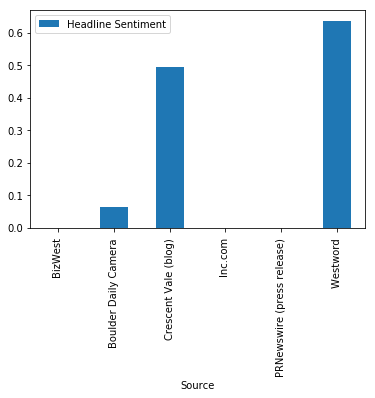

In [176]:
# use the groupby method to normalize data by source 
sentiment_group = sentiment_table.groupby("Source")

# use the mean method to calculate average sentiment
mean_sentiment = sentiment_group.mean()

# use the plot method to draw a bar graph
mean_sentiment.plot(kind="bar")

# The Prestige

In [177]:
# update the code in Retrieving the HTML Document to the below

# store the search term in a variable
# update this value and select Runtime > Run All to visualize new headlines
search_term = "galvanize+boulder"

# store request url in a variable
request_url = "https://www.google.com/search?tbm=nws&q=" + search_term

# use the get function from the requests Module  
# store the output of the function in a variable
response = requests.get(request_url)

# extract the content from our response
# refer to http://docs.python-requests.org/en/master/api/#requests.Response
news_page = response.content

# use the built-in print function to display the news_page
print(news_page)


b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=galvanize+boulder&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=r6CvXLP6O4P_0wL4rYe4Bw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=galvanize+boulder&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=r6CvXLP6O4P_0wL4rYe4Bw">here</a> if you are not redirected within a few seconds.</div></noscript><title>galvanize boulder - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5

# Possible Future Projects


- Redo everything here locally on your machine by installing python

- Try a different web page 

- Try making better visualizations with Matplotlib

- Save the data and export to something like Tableau 

- Look up how to navigate and scrape pages linked together

# Resources:

## Documentation 
[Python](https://docs.python.org/3/)    
[Requests](http://docs.python-requests.org/en/master/)    
[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/)    
[re](https://docs.python.org/3/library/re.html)    
[Pandas](https://pandas.pydata.org/)    
[NLTK](https://www.nltk.org/)    

A **Framework** for scraping: [Scrapy](https://scrapy.org/) 


## Galvanize

#### Data Science 

[Free Data Science Prep](https://www.galvanize.com/data-science-prep)


#### Immersive Bootcamp

- [Data Science](https://www.galvanize.com/data-science) - 5/6/19 - 8/2/19 

- [Software Engineer](https://www.galvanize.com/web-development) - 2/19/19 - 5/17/19

#### Part-Time Courses

- [Data Analytics](https://www.galvanize.com/part-time/data-analytics) 2/12/19 - 5/2/19
- [Python Fundamentals](https://www.galvanize.com/part-time/data-science-fundamentals) - 2/20/19 - 3/29/19

#### Co-working Space

[work in our building!](https://www.galvanize.com/entrepreneur)


## Me

Please stay in touch - reach out with questions, PRs, meetups, etc.

- Github: [nicholasgriffen](https://github.com/nicholasgriffen/)
- LinkedIn: [nicholas-griffen](https://www.linkedin.com/in/nicholas-griffen/) 
- Email: [nicholas.s.griffen@gmail.com](mailto:nicholas.s.griffen@gmail.com)
